In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("20230802_Matrícula_Ed_Superior_2023_PUBL_MRUN.csv", delimiter=";")
df.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_7132\880468899.py:1: DtypeWarning: Columns (49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("20230802_Matrícula_Ed_Superior_2023_PUBL_MRUN.csv", delimiter=";")


,cat_periodo,id,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,...,area_carrera_generica,cine_f_13_area,cine_f_13_subarea,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso
0,2023,927537,I111S2C48J2V1,25.0,1,200212,20 a 24 años,2023,1,2023,...,Ingeniería en Computación e Informática,Tecnología de la Información y la Comunicación...,Tecnología de la Información y la Comunicación...,NO ACREDITADA,ACREDITADA,26/08/2017 AL 26/08/2024,7.0,0,0,1- Ingreso Directo (regular)
1,2023,927464,I45S2C4J1V1,26.0,2,200212,20 a 24 años,2022,1,2022,...,Derecho,Administración de Empresas y Derecho,Derecho,NO ACREDITADA,ACREDITADA,16/12/2021 AL 16/12/2027,6.0,0,0,1- Ingreso Directo (regular)
2,2023,362242,I31S2C41J1V1,35.0,1,199711,25 a 29 años,2017,1,2017,...,Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,29/10/2019 AL 29/10/2024,5.0,244970,70000,1- Ingreso Directo (regular)
3,2023,1330048,I70S1C900J1V1,43.0,2,199007,30 a 34 años,2020,1,2020,...,Doctorado en Ciencias Sociales,"Ciencias Sociales, Periodismo e Información",Ciencias Sociales y del Comportamiento,NO ACREDITADA,ACREDITADA,22/12/2018 AL 22/12/2025,7.0,0,64000,1- Ingreso Directo (regular)
4,2023,81882,I143S27C34J2V1,51.0,2,198305,40 y más años,2022,1,2022,...,Técnico en Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,23/11/2022 AL 23/11/2027,5.0,816000,0,1- Ingreso Directo (regular)


In [3]:
df["matricula2"] = df.apply(lambda x: x["valor_matricula"] * 36000 if x["formato_valores"] == "Monto en UF" else x["valor_matricula"], axis=1)
df["arancel2"] = df.apply(lambda x: x["valor_arancel"] * 36000 if x["formato_valores"] == "Monto en UF" else x["valor_arancel"], axis=1)
df["fn"] = df["fec_nac_alu"].astype(str).apply(lambda x: x[4:6] + "-14-" + x[0:4])
df["fn"] = pd.to_datetime(df["fn"])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Diurno'),
  Text(1, 0, 'Vespertino'),
  Text(2, 0, 'Semipresencial'),
  Text(3, 0, 'A Distancia'),
  Text(4, 0, 'Otro')])

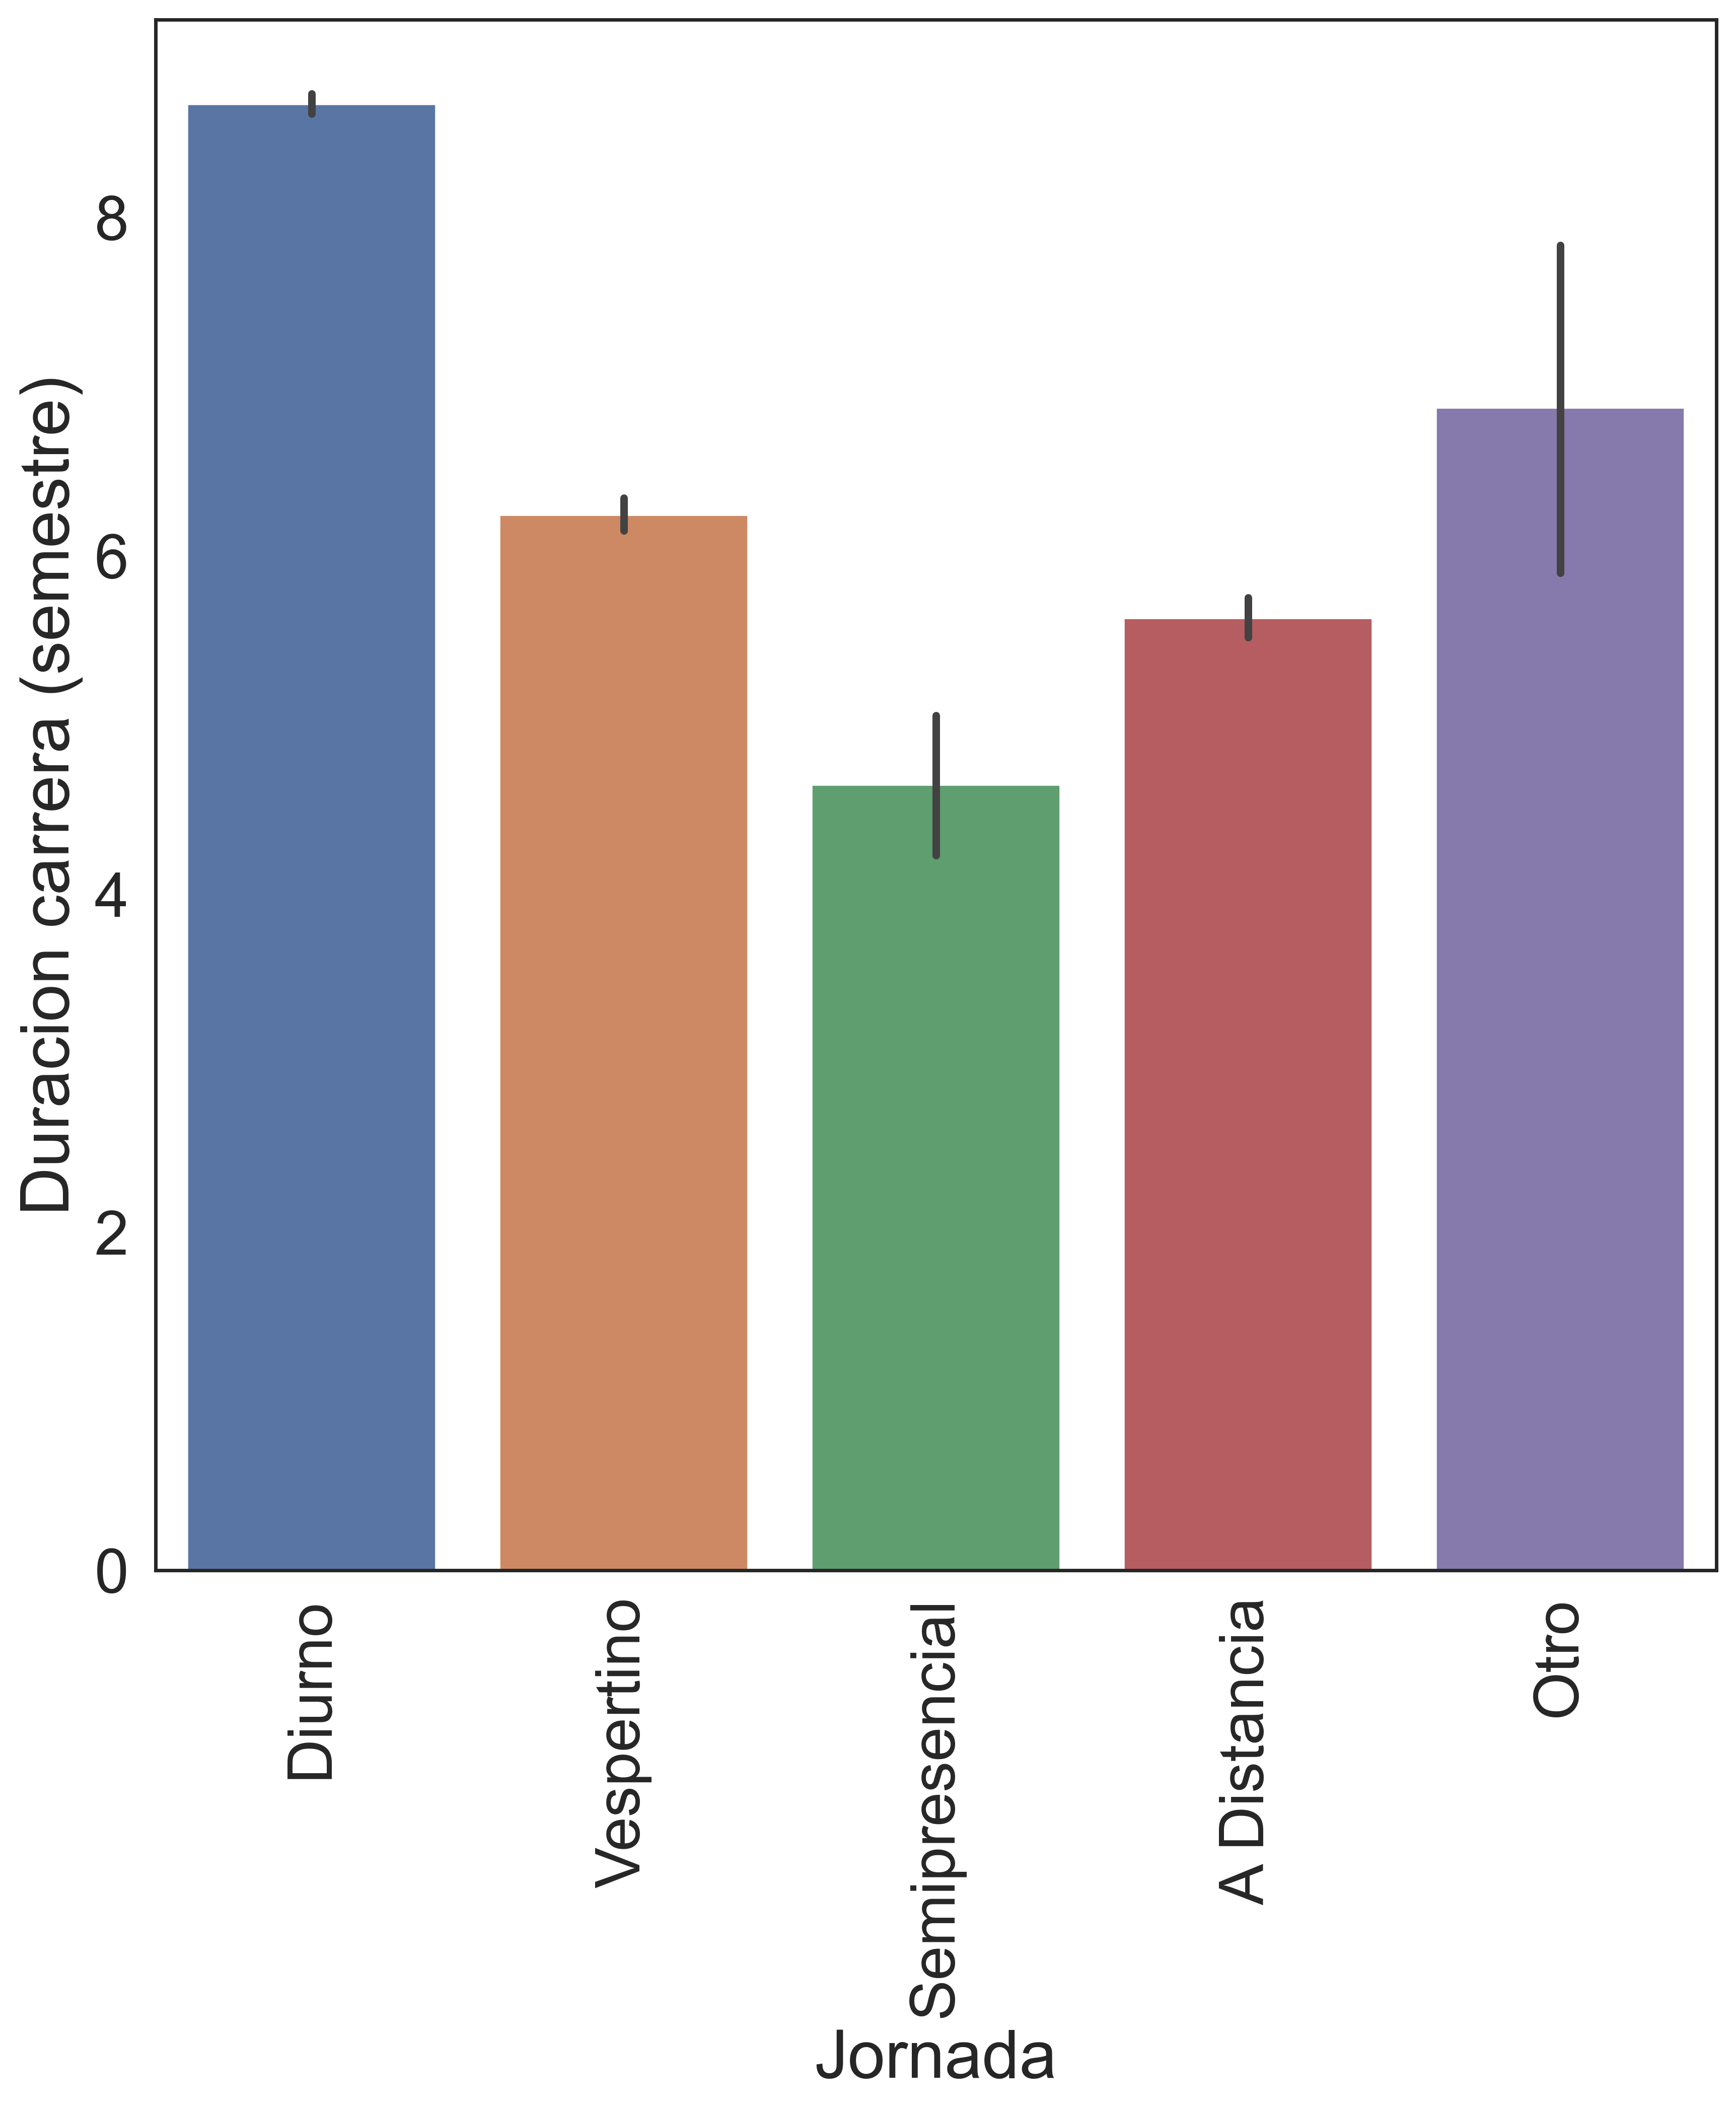

In [11]:
sns.set(font_scale=2, style="white")

fig, ax = plt.subplots(figsize=(10, 10), dpi=400)

g = sns.barplot(x="jornada", y="dur_total_carr", data=df.sample(10000))

g.set_xlabel("Jornada")
g.set_ylabel("Duracion carrera (semestre)")

plt.xticks(rotation=90)

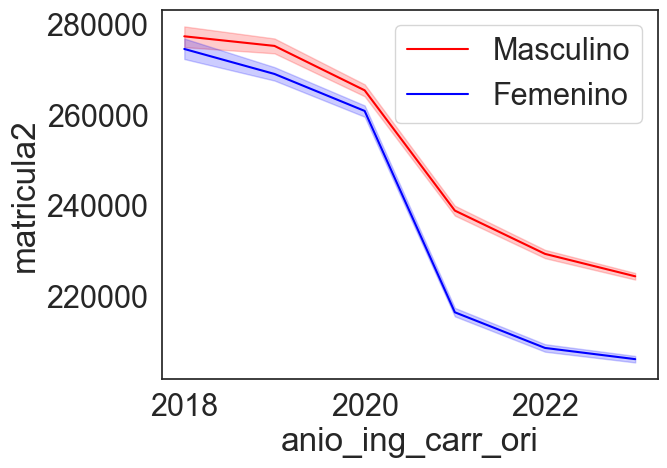

In [20]:
data = df.query("anio_ing_carr_ori > 2017").copy()
data["gen_alu"] = data["gen_alu"].replace({1: "Masculino", 2: "Femenino"})

g = sns.lineplot(
    x="anio_ing_carr_ori", 
    y="matricula2",
    hue="gen_alu",
    palette=["red", "blue"],
    data=data
)

g.legend(title="")